# Example: Fit Static Metrics Data

In [1]:
import importlib.resources as resources

import pandas as pd
import numpy as np

import pysrat.nhpp as srm

from pysrat.data import NHPPData, SMetricsData

from pysrat.nhpp.regression.pr_nhpp import fit_pr_nhpp

In [2]:
data_path = resources.files("pysrat").joinpath("datasets/smetrics/tomcat5_smetrics.csv")
df = pd.read_csv(data_path, index_col=0)
df

LOC     St    Br    Co    Fn   Mc    Ac
catalina   125462  39386  19.2  34.4  4543   90  2.79
connector  168482  65829  19.2  26.9  5912  175  3.37
jasper      41861  15557  19.2  26.8  1691   90  2.88
servlets    15480   1944   8.0  66.5   400   26  1.45
tester      12677   4750  19.7  30.2   409   54  3.36
webapps     37782  12851   9.5  31.2  1035   39  2.32

In [3]:
data = SMetricsData.from_dataframe(df, use_index_as_name=True)
data

SMetricsData(n=6, nmetrics=7, names=['catalina', 'connector', 'jasper', 'servlets', 'tester', 'webapps'])

In [4]:
names = [
    'jasper',
    'connector',
    'servlets',
    'webapps',
    'catalina',
    'tester',
]

# dfs = {nm: pd.read_csv(resources.files("pysrat").joinpath(f"datasets/smetrics/tomcat5_{nm}.csv"), index_col=0) for nm in names}
# data_list = {nm: NHPPData.from_intervals(time=df['time'], fault=df['fault']) for nm, df in dfs.items()}

data_list = {nm: NHPPData.from_csv(
    resources.files("pysrat").joinpath(f"datasets/smetrics/tomcat5_{nm}.csv"),
    intervals="time",
    counts="fault") for nm in names}

In [5]:
srms = {nm: srm.GammaNHPP().fit(data) for nm, data in data_list.items()}
srms

{'jasper': GammaNHPP(omega=74.0429, shape=4.77829, rate=0.00460357),
 'connector': GammaNHPP(omega=89.3351, shape=4.86565, rate=0.00388812),
 'servlets': GammaNHPP(omega=57.0314, shape=5.28253, rate=0.00488839),
 'webapps': GammaNHPP(omega=65.8275, shape=2.75211, rate=0.00234243),
 'catalina': GammaNHPP(omega=272.873, shape=4.67715, rate=0.00386126),
 'tester': GammaNHPP(omega=1, shape=163297, rate=84.4582)}

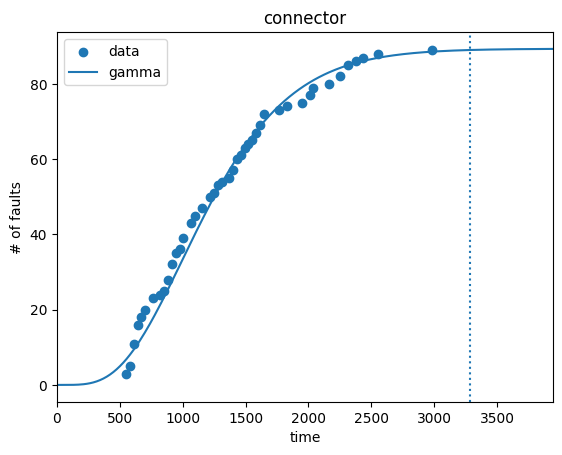

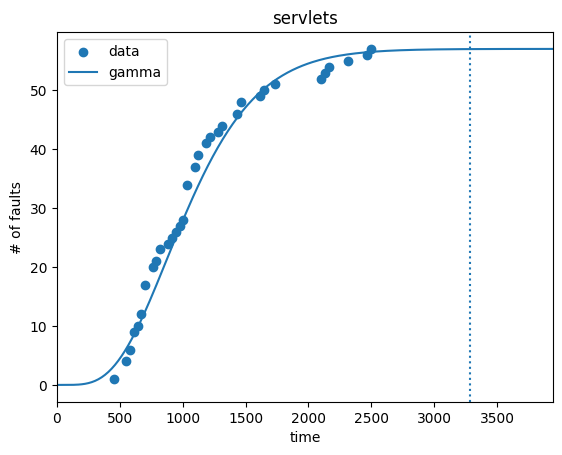

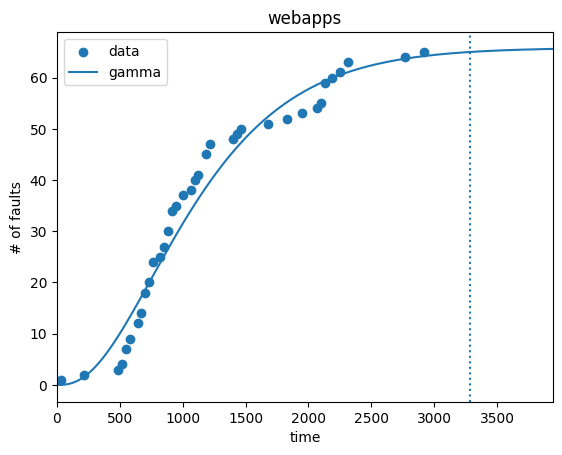

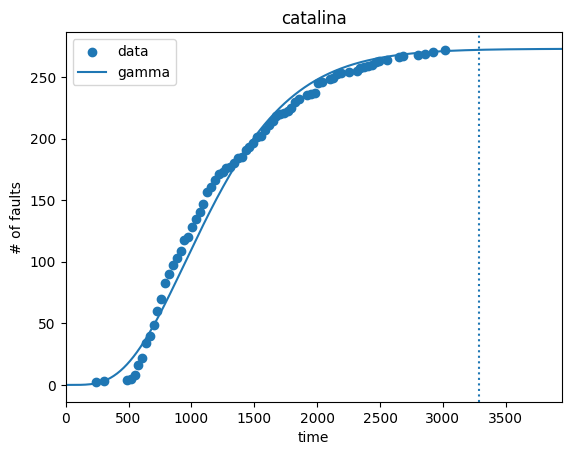

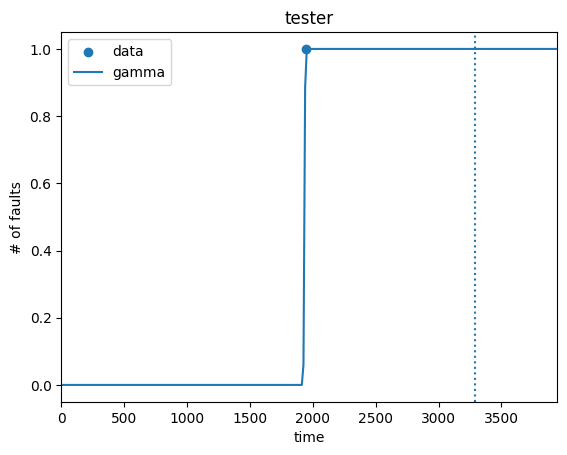

In [6]:
for nm in names:
    srm.plot_mvf(data_list[nm], srms[nm], title=nm)

In [7]:
fit_pr_nhpp(srms, data, initialize=True, alpha=0.5, lambd=5.0)

{'models': {'jasper': GammaNHPP(omega=76.4196, shape=4.77738, rate=0.00460248),
  'connector': GammaNHPP(omega=93.3641, shape=4.85907, rate=0.00388137),
  'servlets': GammaNHPP(omega=57.5669, shape=5.28225, rate=0.00488807),
  'webapps': GammaNHPP(omega=67.1447, shape=2.7478, rate=0.00233694),
  'catalina': GammaNHPP(omega=264.599, shape=4.68085, rate=0.00386519),
  'tester': GammaNHPP(omega=97.7107, shape=2.20245, rate=6.12602e-05)},
 'names': ['jasper', 'connector', 'servlets', 'webapps', 'catalina', 'tester'],
 'coef': array([ 3.52235596e+00,  6.25624699e-06,  0.00000000e+00,  9.60325862e-02,
         1.03389712e-03,  2.49330249e-04, -1.93462396e-02,  0.00000000e+00]),
 'omega': array([ 76.41956144,  93.36410515,  57.56687895,  67.14470782,
        264.59879444,  97.7107106 ]),
 'total': array([ 74.04434998,  89.35306666,  57.03173231,  65.85023439,
        272.84206991,  97.68330515]),
 'llf': -574.6217172045355,
 'converged': False,
 'n_iter': 2000,
 'glm_converged': True,
 'glm_n

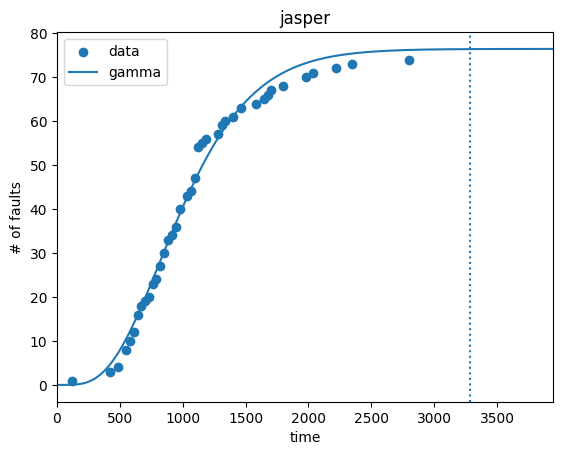

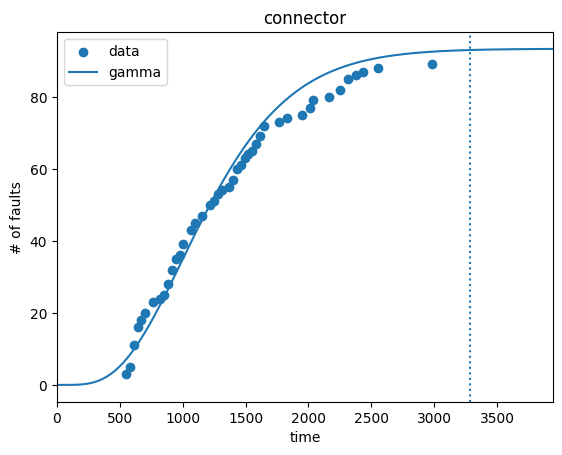

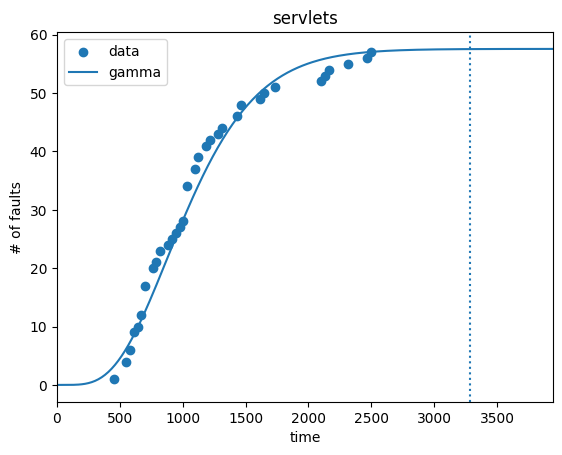

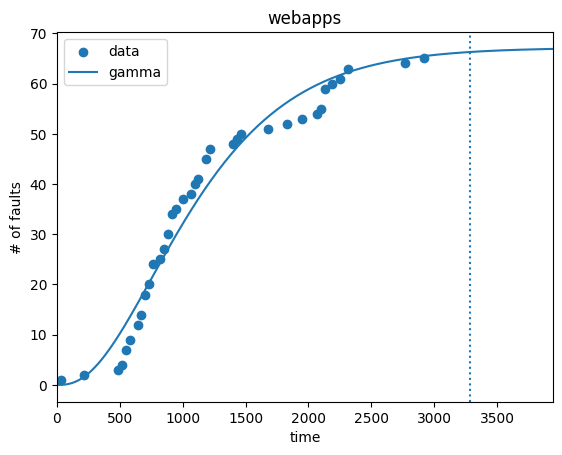

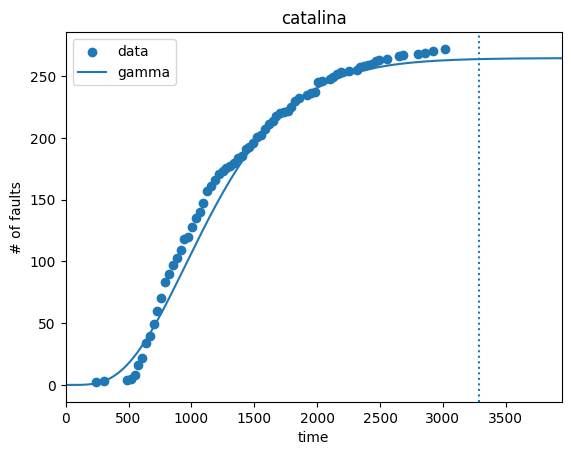

In [8]:
for nm in names:
    srm.plot_mvf(data_list[nm], srms[nm], title=nm)